In [1]:
import numpy as np

In [2]:
class SVM_classifier():
    
    def __init__(self,learning_rate,no_of_iterations,lambda_parameter):
        self.learning_rate=learning_rate
        self.no_of_iterations=no_of_iterations
        self.lambda_parameter=lambda_parameter
        
    def fit(self,X,Y):
        
        self.m,self.n=X.shape
        self.w=np.zeros(self.n)
        self.b=0
        self.X=X
        self.Y=Y
        
        for i in range(self.no_of_iterations):
          self.update_weights()
            
         
    def update_weights(self):
        
        
        y_label=np.where(self.Y<=0,-1,1)
        
        for index,x_i in enumerate(self.X):
            condition= y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
            
        if(condition==True):
            
            dw=2 * self.lambda_parameter * self.w
            db=0
            
        else:
            
            
            dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
            db=y_label[index]
            
            self.w=self.w-self.learning_rate*dw
            self.b=self.b-self.learning_rate*db
            
            
            
    def predict(self,X):
        output=np.dot(X, self.w)-self.b
        predicted_labels=np.sign(output)
        y_hat=np.where(predicted_labels<=-1,0,1)
        return y_hat
        

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [4]:
diabetes_data=pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_data.shape

(768, 9)

In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
sns.set()

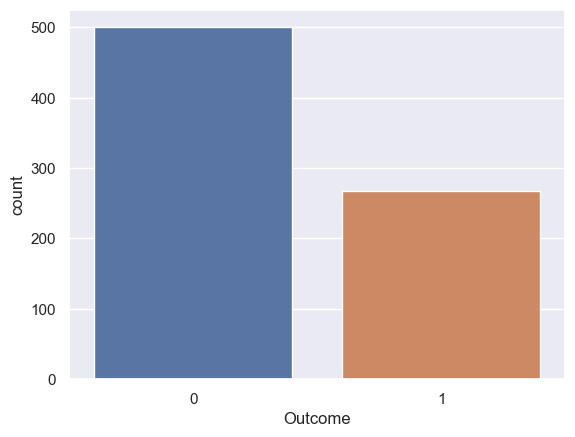

In [10]:
sns.countplot(x='Outcome',data=diabetes_data)
plt.show()

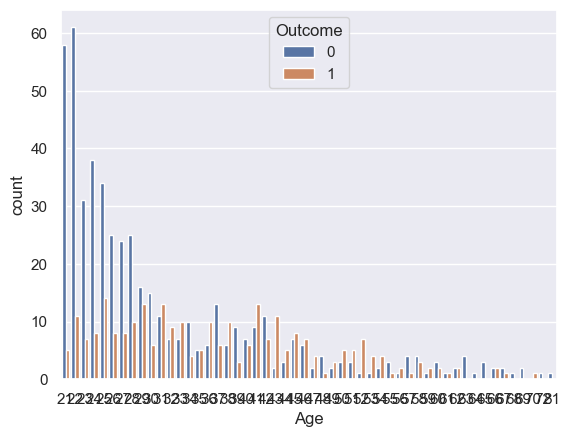

In [11]:
sns.countplot(x='Age',hue='Outcome',data=diabetes_data)
plt.show()

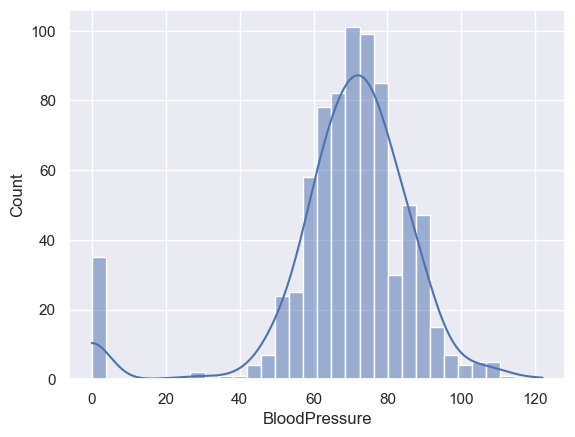

In [12]:
sns.histplot(diabetes_data['BloodPressure'],kde=True)
plt.show()

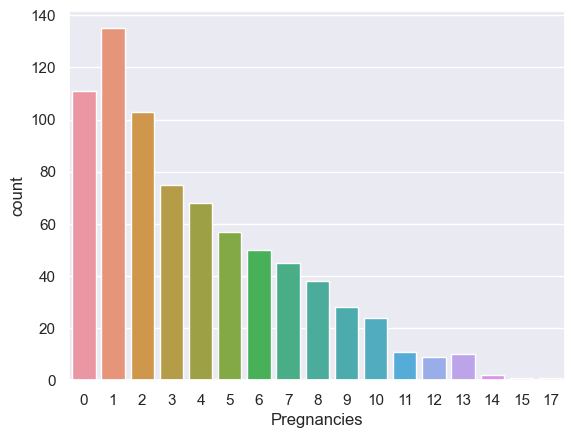

In [13]:
sns.countplot(x='Pregnancies',data=diabetes_data)
plt.show()

In [14]:
feature=diabetes_data.drop(columns='Outcome',axis=1)

In [15]:
target=diabetes_data['Outcome']

In [16]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [17]:
scaler=StandardScaler()

In [18]:
scaler.fit(feature)

StandardScaler()

In [19]:
feature=scaler.transform(feature)

In [20]:
print(feature)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(feature,target,test_size=0.2,random_state=2)

In [22]:
model=SVM_classifier(learning_rate=0.001,no_of_iterations=1000,lambda_parameter=0.01)

In [23]:
model.fit(X_train,Y_train)

In [24]:
training_data_predict=model.predict(X_train)
accuracy=accuracy_score(training_data_predict,Y_train)
accuracy

0.6628664495114006

In [25]:
test_data_predict=model.predict(X_test)
accuracy=accuracy_score(test_data_predict,Y_test)
accuracy

0.6103896103896104